# **Import Library**

In [6]:
!pip install wget # Install the wget library to download the dataset
import wget
import os
import zipfile

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=c97735ac1eff077e757ce025616132b9adbf24f98a285840408aace770a4a7f0
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [7]:
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import cv2
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt
import io
from google.colab import files

# **Import Library Images**

In [8]:
def load_images(directory):
    images = []
    for filename in os.listdir(directory):

          img = Image.open(os.path.join(directory, filename))
          img = img.resize((224, 224))
          img = img.convert('RGB')
          img = np.array(img) / 255.0
          images.append(img)
    return images

In [9]:
tumor_images = load_images('/content/drive/MyDrive/data/yes')
no_tumor_images = load_images('/content/drive/MyDrive/data/no')

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


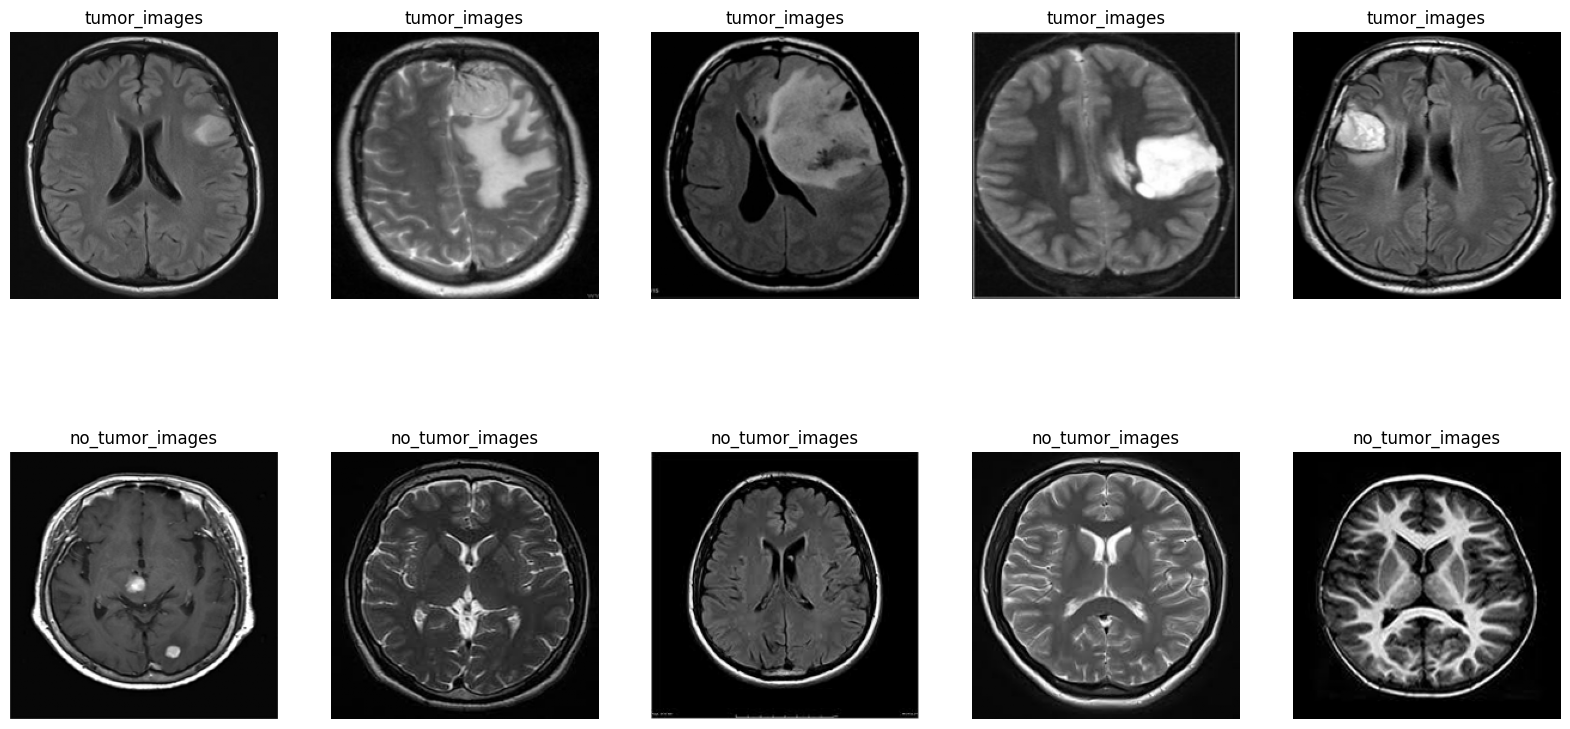

In [13]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i in range(5):
	axes[0, i].imshow(tumor_images[i])
	axes[0, i].set_title('tumor_images')
	axes[0, i].axis('off')

for i in range(5):
	axes[1, i].imshow(no_tumor_images[i])
	axes[1, i].set_title('no_tumor_images')
	axes[1, i].axis('off')

plt.show()


# **Tpye Image**

In [16]:
type(tumor_images)
type(no_tumor_images)

list

In [19]:
len(tumor_images)

155

In [20]:
len(no_tumor_images)

98

In [21]:
tumor_images

[array([[[0.04313725, 0.04313725, 0.04313725],
         [0.04313725, 0.04313725, 0.04313725],
         [0.04313725, 0.04313725, 0.04313725],
         ...,
         [0.04313725, 0.04313725, 0.04313725],
         [0.04313725, 0.04313725, 0.04313725],
         [0.04313725, 0.04313725, 0.04313725]],
 
        [[0.04313725, 0.04313725, 0.04313725],
         [0.04313725, 0.04313725, 0.04313725],
         [0.04313725, 0.04313725, 0.04313725],
         ...,
         [0.04313725, 0.04313725, 0.04313725],
         [0.04313725, 0.04313725, 0.04313725],
         [0.04313725, 0.04313725, 0.04313725]],
 
        [[0.04313725, 0.04313725, 0.04313725],
         [0.04313725, 0.04313725, 0.04313725],
         [0.04313725, 0.04313725, 0.04313725],
         ...,
         [0.04313725, 0.04313725, 0.04313725],
         [0.04313725, 0.04313725, 0.04313725],
         [0.04313725, 0.04313725, 0.04313725]],
 
        ...,
 
        [[0.04313725, 0.04313725, 0.04313725],
         [0.04313725, 0.04313725, 0.04313

In [22]:
no_tumor_images

[array([[[0.30980392, 0.30980392, 0.30980392],
         [0.19215686, 0.19215686, 0.19215686],
         [0.2       , 0.2       , 0.2       ],
         ...,
         [0.20392157, 0.20392157, 0.20392157],
         [0.19215686, 0.19215686, 0.19215686],
         [0.30980392, 0.30980392, 0.30980392]],
 
        [[0.14117647, 0.14117647, 0.14117647],
         [0.        , 0.        , 0.        ],
         [0.00784314, 0.00784314, 0.00784314],
         ...,
         [0.00784314, 0.00784314, 0.00784314],
         [0.        , 0.        , 0.        ],
         [0.14117647, 0.14117647, 0.14117647]],
 
        [[0.15686275, 0.15686275, 0.15686275],
         [0.00784314, 0.00784314, 0.00784314],
         [0.02745098, 0.02745098, 0.02745098],
         ...,
         [0.03137255, 0.03137255, 0.03137255],
         [0.00784314, 0.00784314, 0.00784314],
         [0.15686275, 0.15686275, 0.15686275]],
 
        ...,
 
        [[0.15686275, 0.15686275, 0.15686275],
         [0.01176471, 0.01176471, 0.01176

In [25]:
def assign_labels(tumor_images, no_tumor_images):
	tumor_labels = np.ones(len(tumor_images))
	no_tumor_labels = np.zeros(len(no_tumor_images))
	return tumor_labels, no_tumor_labels
tumor_labels, no_tumor_labels = assign_labels(tumor_images, no_tumor_images)

# **Label No Tumor and Tumor**

In [26]:
tumor_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [27]:
no_tumor_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# **Type New Labels**

In [29]:
type(tumor_labels)
type(no_tumor_labels)

numpy.ndarray

In [31]:
data = tumor_images + no_tumor_images
labels = np.concatenate((tumor_labels, no_tumor_labels), axis=0)

In [32]:
data

[array([[[0.04313725, 0.04313725, 0.04313725],
         [0.04313725, 0.04313725, 0.04313725],
         [0.04313725, 0.04313725, 0.04313725],
         ...,
         [0.04313725, 0.04313725, 0.04313725],
         [0.04313725, 0.04313725, 0.04313725],
         [0.04313725, 0.04313725, 0.04313725]],
 
        [[0.04313725, 0.04313725, 0.04313725],
         [0.04313725, 0.04313725, 0.04313725],
         [0.04313725, 0.04313725, 0.04313725],
         ...,
         [0.04313725, 0.04313725, 0.04313725],
         [0.04313725, 0.04313725, 0.04313725],
         [0.04313725, 0.04313725, 0.04313725]],
 
        [[0.04313725, 0.04313725, 0.04313725],
         [0.04313725, 0.04313725, 0.04313725],
         [0.04313725, 0.04313725, 0.04313725],
         ...,
         [0.04313725, 0.04313725, 0.04313725],
         [0.04313725, 0.04313725, 0.04313725],
         [0.04313725, 0.04313725, 0.04313725]],
 
        ...,
 
        [[0.04313725, 0.04313725, 0.04313725],
         [0.04313725, 0.04313725, 0.04313

In [33]:
labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [34]:
data[0].shape

(224, 224, 3)

In [35]:
x = np.array(data)
y = np.array(labels)

# **Split Train Test**

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state = 42)

In [37]:
train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test = tf.data.Dataset.from_tensor_slices((x_test, y_test))

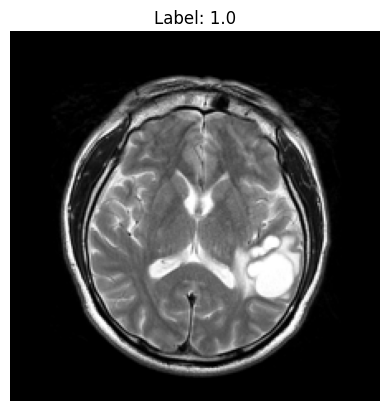

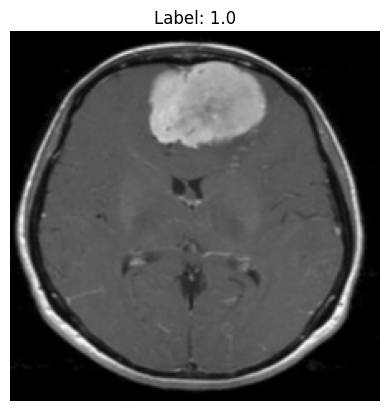

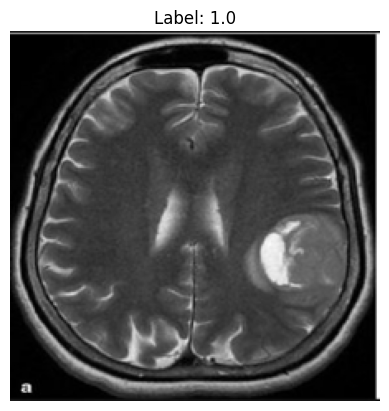

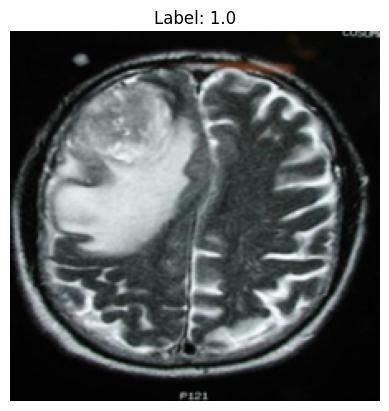

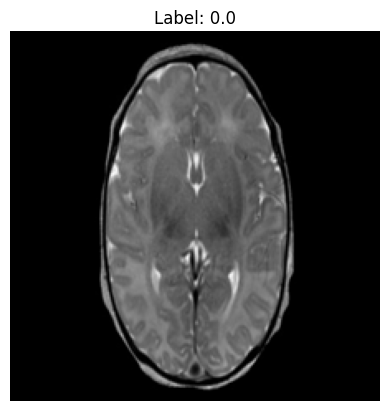

In [40]:
for image, label in train.take(5):
	plt.figure()
	plt.imshow(image.numpy())
	plt.title('Label: {}'.format(label.numpy()))
	plt.axis('off')
	plt.show()


In [41]:
validation_size = int(0.1 * 210)
train = train.skip(validation_size)
val = train.take(validation_size)

In [42]:
BATCH_SIZE = 32
train = train.batch(BATCH_SIZE)
test = test.batch(BATCH_SIZE)
val = val.batch(BATCH_SIZE)

In [48]:
model = Sequential()

# Changed input_shape to (224, 224, 3) to match the actual image size
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (224,224,3), padding='valid'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 394272)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │     100,933,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,935,041 (385.04 MB)

 Trainable params: 100,935,041 (385.04 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [51]:
history = model.fit(train, validation_data = val, epochs = 20, verbose = 1)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.5228 - loss: 9.6533 - val_accuracy: 0.8571 - val_loss: 3.0095
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.7677 - loss: 2.9004 - val_accuracy: 0.8095 - val_loss: 0.9322
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.7517 - loss: 2.0119 - val_accuracy: 0.9048 - val_loss: 0.9692
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - accuracy: 0.8599 - loss: 0.7191 - val_accuracy: 0.9524 - val_loss: 0.1328
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.8493 - loss: 0.2899 - val_accuracy: 0.9524 - val_loss: 0.0859
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.9627 - loss: 0.1071 - val_accuracy: 0.9524 - val_loss: 0.0783
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.9640 - loss: 0.0829 - val_accuracy: 1.0000 - val_loss: 0.0553
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9816 - loss: 0.0649 - val_accuracy: 1.0000 - val_loss: 0.0379
Epoch 9/

# **Evaluation**

In [52]:
evaluation = model.evaluate(test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 286ms/step - accuracy: 0.7833 - loss: 1.8417


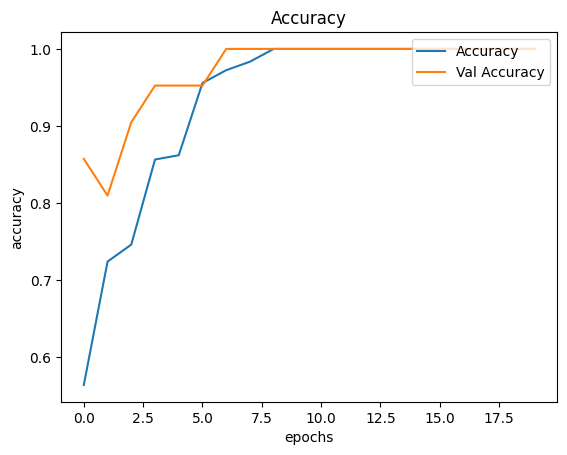

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'Val Accuracy'], loc = 'upper right')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()


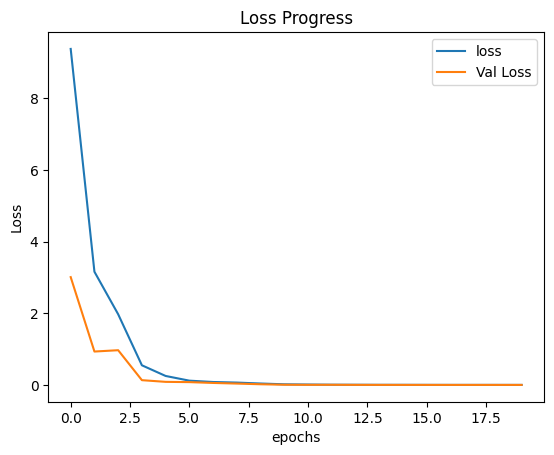

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'Val Loss'], loc = 'upper right')
plt.title('Loss Progress')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

# **Save DATA Model with H5**

In [58]:
model.save("/content/drive/MyDrive/data/brain_tumor.h5")

# **Updated Code (Using Pickle)**

In [59]:
import pickle

# Save the model as a pickle file
with open("/content/drive/MyDrive/data/brain_tumor.pkl", "wb") as f:
    pickle.dump(model, f)

In [68]:
def load_uploaded_image(image_bytes):
    img = Image.open(io.BytesIO(image_bytes))
    img = img.resize((224, 224))  # Changed the height to 224
    img_array = np.array(img)
    img_array = img_array / 255.0
    return img_array

def predict_image(image_bytes):
    img_array = load_uploaded_image(image_bytes)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        return "Tumor detected"
    else:
        return "No tumor detected"

Saving Y15.jpg to Y15.jpg


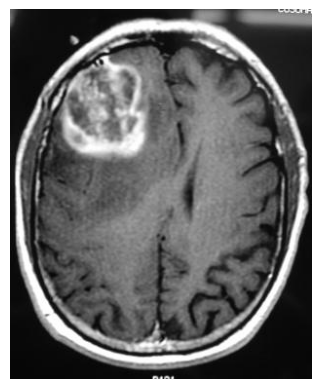

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Tumor detected


In [70]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
image_bytes = uploaded[file_name]
img = Image.open(io.BytesIO(image_bytes))

plt.imshow(img)
plt.axis('off')
plt.show()

result = predict_image(image_bytes)
print(result)

# **install Requirement**

In [71]:
!pip install session-info

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 3.4 MB/s eta 0:00:00


In [77]:
pip freeze > requirements.txt